<a href="https://colab.research.google.com/github/leifblake/cgt370lab5/blob/main/Blake_Leif_Lab5_CGT370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##(Previous) LAB 3:

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes_20250127.csv'

df = pd.read_csv(file_path)


Mounted at /content/drive


<ipython-input-1-b0249c3b919e>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in less critical columns with placeholders
df_cleaned['ZIP CODE'] = df_cleaned['ZIP CODE'].fillna('UNKNOWN')
df_cleaned['ON STREET NAME'] = df_cleaned['ON STREET NAME'].fillna('UNKNOWN')

print(df_cleaned.isnull().sum())


CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           666464
ZIP CODE                          666730
LATITUDE                          239596
LONGITUDE                         239596
LOCATION                          239596
ON STREET NAME                    462305
CROSS STREET NAME                 820302
OFF STREET NAME                  1781236
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7336
CONTRIBUTING FACTOR VEHICLE 2     339798
CONTRIBUTING FACTOR VEHICLE 3    1996155
CONTRIBUTING FACTOR VEHICLE 4    2115904
CONTRIBUTING FACTOR VEHICLE 5    2141540
COLLISION_ID                           0
VEHICLE TYPE COD

NameError: name 'df_cleaned' is not defined

In [ ]:
# Make a copy of the original DataFrame to work on cleaned data
df_cleaned = df.copy()


In [ ]:
# Fill missing values in less critical columns with placeholders
df_cleaned['ZIP CODE'] = df_cleaned['ZIP CODE'].fillna('UNKNOWN')
df_cleaned['ON STREET NAME'] = df_cleaned['ON STREET NAME'].fillna('UNKNOWN')
df_cleaned['BOROUGH'] = df_cleaned['BOROUGH'].fillna('UNKNOWN')

print(df_cleaned.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                          239596
LONGITUDE                         239596
LOCATION                          239596
ON STREET NAME                         0
CROSS STREET NAME                 820302
OFF STREET NAME                  1781236
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7336
CONTRIBUTING FACTOR VEHICLE 2     339798
CONTRIBUTING FACTOR VEHICLE 3    1996155
CONTRIBUTING FACTOR VEHICLE 4    2115904
CONTRIBUTING FACTOR VEHICLE 5    2141540
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
cleaned_file_path = '/content/drive/My Drive/Cleaned_Collisions.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

In [ ]:
# Convert CRASH TIME to datetime and extract the hour
df_cleaned['CRASH TIME'] = pd.to_datetime(df_cleaned['CRASH TIME'], format='%H:%M', errors='coerce')
df_cleaned['HOUR'] = df_cleaned['CRASH TIME'].dt.hour

print(df_cleaned[['CRASH TIME', 'HOUR']].head())

           CRASH TIME  HOUR
0 1900-01-01 02:39:00     2
1 1900-01-01 11:45:00    11
2 1900-01-01 06:55:00     6
3 1900-01-01 09:35:00     9
4 1900-01-01 08:13:00     8


In [ ]:
# Group by hour and count collisions
hourly_collisions = df_cleaned.groupby('HOUR').agg({'CRASH DATE': 'count'}).rename(columns={'CRASH DATE': 'COLLISION_COUNT'})

# Reset the index for better readability
hourly_collisions = hourly_collisions.reset_index()

print(hourly_collisions)

    HOUR  COLLISION_COUNT
0      0            70222
1      1            37867
2      2            29045
3      3            25591
4      4            29095
5      5            31467
6      6            48407
7      7            66007
8      8           118029
9      9           113448
10    10           105973
11    11           110601
12    12           117661
13    13           123375
14    14           142625
15    15           134060
16    16           154001
17    17           150974
18    18           132824
19    19           109442
20    20            91548
21    21            77993
22    22            71078
23    23            59835


In [ ]:
pivot_table = pd.pivot_table(
    df_cleaned,
    values=['NUMBER OF PERSONS INJURED', 'CRASH DATE'],
    index='BOROUGH',
    aggfunc={'NUMBER OF PERSONS INJURED': 'sum', 'CRASH DATE': 'count'}
).rename(columns={'CRASH DATE': 'COLLISION_COUNT'})

pivot_table = pivot_table.reset_index()

print(pivot_table)

# Calculate correlation
correlation = pivot_table['COLLISION_COUNT'].corr(pivot_table['NUMBER OF PERSONS INJURED'])
print(f"Correlation coefficient between collisions and persons injured: {correlation}")


         BOROUGH  COLLISION_COUNT  NUMBER OF PERSONS INJURED
0          BRONX           219761                    74268.0
1       BROOKLYN           473971                   161644.0
2      MANHATTAN           330487                    72407.0
3         QUEENS           398217                   123716.0
4  STATEN ISLAND            62268                    18259.0
5        UNKNOWN           666464                   237991.0
Correlation coefficient between collisions and persons injured: 0.9758723732738896


##LAB 5:

##Part 1:

In [6]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes_20250127.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


<ipython-input-6-a4e5c9029b85>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151168 entries, 0 to 2151167
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Graph: Number of collisions per borough
collisions_per_borough = df.groupby('Borough')['Collisions'].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Bar Graph
ax1.bar(collisions_per_borough.index, collisions_per_borough.values, color='skyblue')
average_collisions = collisions_per_borough.mean()
ax1.axhline(average_collisions, color='red', linestyle='--', label=f'Average: {average_collisions:.2f}')
ax1.set_title('Distribution of Collisions Among Boroughs')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Collisions')
ax1.legend()

# Pie Chart
ax2.pie(collisions_per_borough.values, labels=collisions_per_borough.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(collisions_per_borough)))
ax2.set_title('Collision Distribution Among Boroughs')

plt.tight_layout()
plt.show()

KeyError: 'Borough'

In [9]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

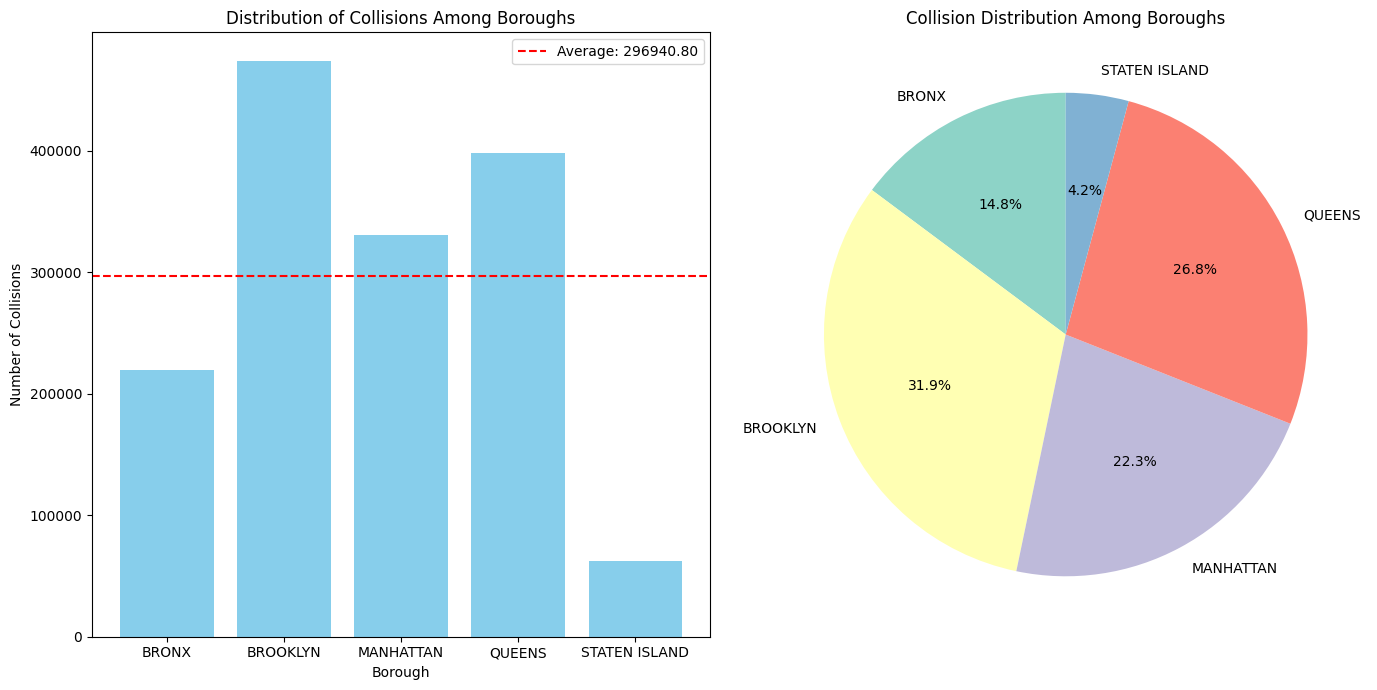

In [10]:
collisions_per_borough = df.groupby('BOROUGH')['COLLISION_ID'].nunique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.bar(collisions_per_borough.index, collisions_per_borough.values, color='skyblue')
average_collisions = collisions_per_borough.mean()
ax1.axhline(average_collisions, color='red', linestyle='--', label=f'Average: {average_collisions:.2f}')
ax1.set_title('Distribution of Collisions Among Boroughs')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Collisions')
ax1.legend()

ax2.pie(collisions_per_borough.values, labels=collisions_per_borough.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(collisions_per_borough)))
ax2.set_title('Collision Distribution Among Boroughs')

plt.tight_layout()
plt.show()

###Must extract hour from CRASH TIME

In [12]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')

df['Hour'] = df['CRASH TIME'].dt.hour

# Check the first few rows to confirm
df[['CRASH TIME', 'Hour']].head()

<ipython-input-12-3f1f321449d8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')


,CRASH TIME,Hour
0,2025-02-05 02:39:00,2
1,2025-02-05 11:45:00,11
2,2025-02-05 06:55:00,6
3,2025-02-05 09:35:00,9
4,2025-02-05 08:13:00,8


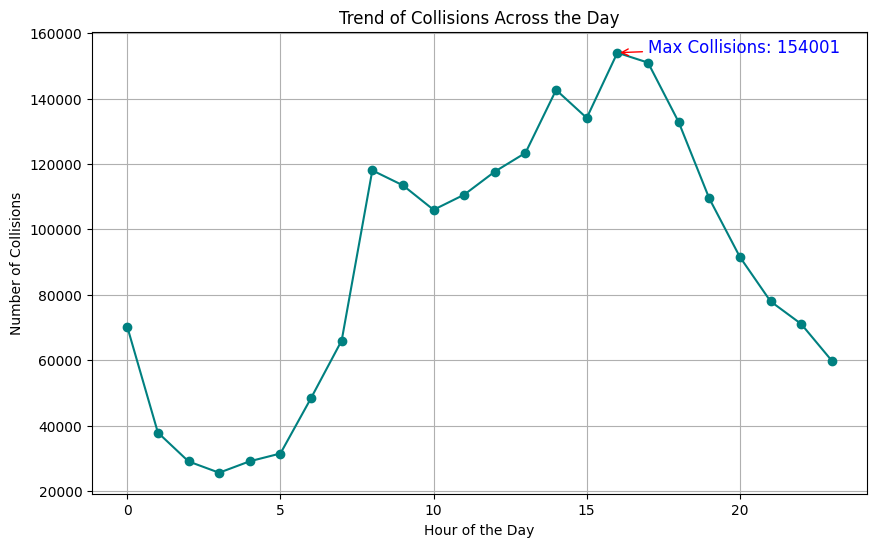

In [13]:
collisions_per_hour = df.groupby('Hour')['COLLISION_ID'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(collisions_per_hour.index, collisions_per_hour.values, marker='o', color='teal')

max_collisions_hour = collisions_per_hour.idxmax()
max_collisions_value = collisions_per_hour.max()
plt.annotate(f'Max Collisions: {max_collisions_value}', xy=(max_collisions_hour, max_collisions_value),
             xytext=(max_collisions_hour+1, max_collisions_value+5),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='blue')

plt.title('Trend of Collisions Across the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')

plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

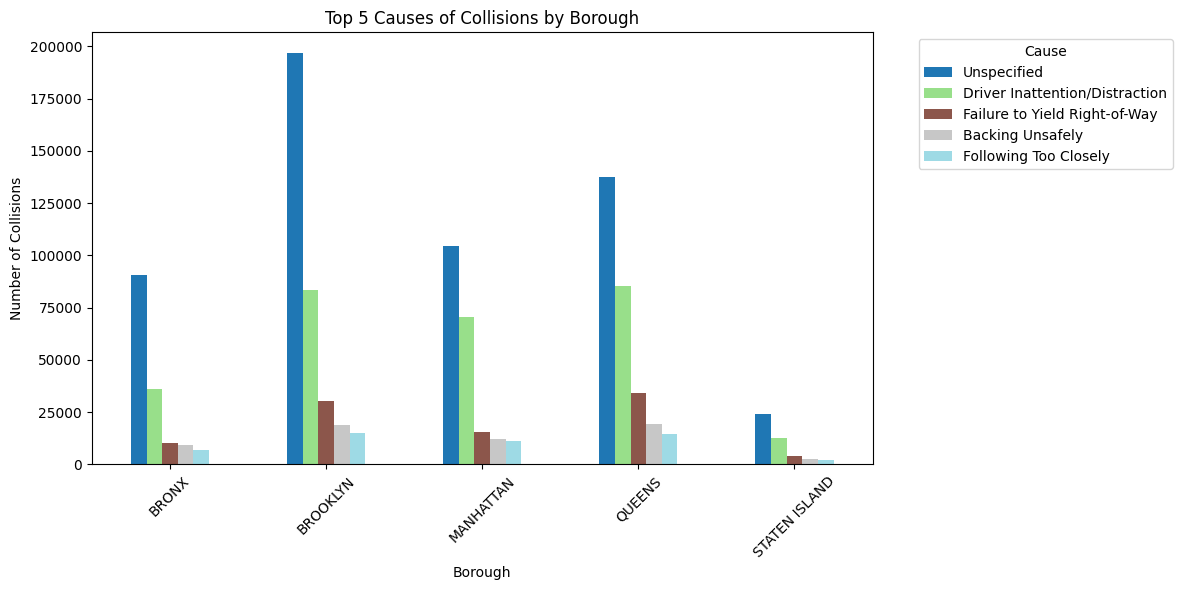

In [14]:
# Select relevant contributing factor columns for causes
cause_columns = [
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'
]

df_causes = df[cause_columns].melt(value_name='Cause').dropna(subset=['Cause'])

df_causes['BOROUGH'] = df['BOROUGH']

# Group by 'BOROUGH' and 'Cause' to count the number of occurrences
collision_causes = df_causes.groupby(['BOROUGH', 'Cause']).size().unstack().fillna(0)

# Select the top 5 causes by total collisions
total_causes = collision_causes.sum(axis=0)
top_5_causes = total_causes.nlargest(5).index

# Plot the grouped bar graph
plt.figure(figsize=(12, 6))
collision_causes[top_5_causes].plot(kind='bar', stacked=False, figsize=(12, 6), colormap='tab20')

# Title and labels
plt.title('Top 5 Causes of Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##Part 2:

###https://matplotlib.org/stable/plot_types/index.html

###Plot 1: Box Plot (Dist. of Collisions per Borough)

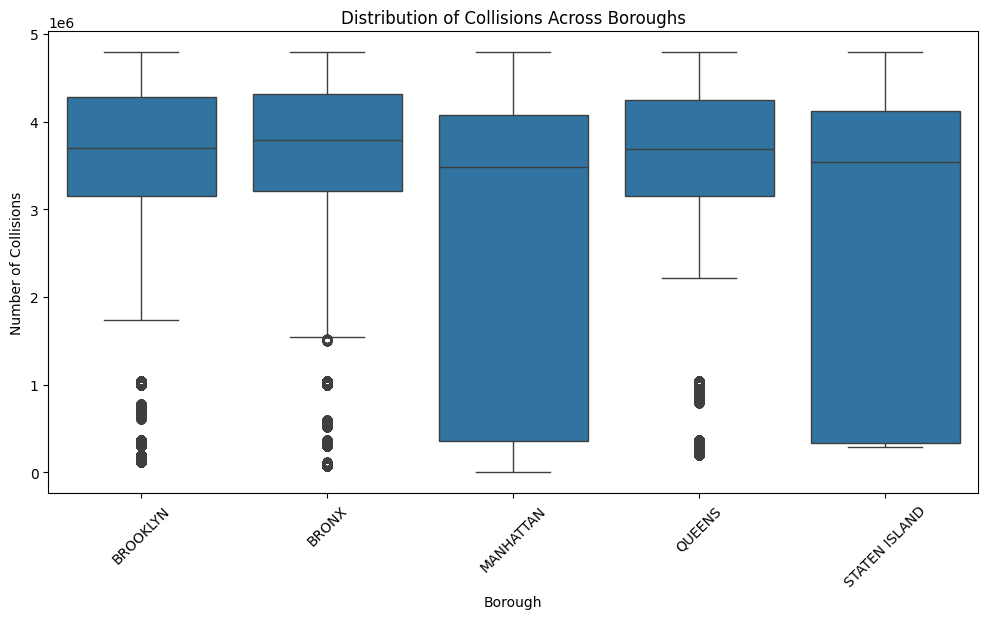

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BOROUGH', y='COLLISION_ID', data=df)
plt.title('Distribution of Collisions Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

###Plot 2: Heatmap of Collision Correlations

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Collision Factors')
plt.show()

ValueError: could not convert string to float: '09/11/2021'

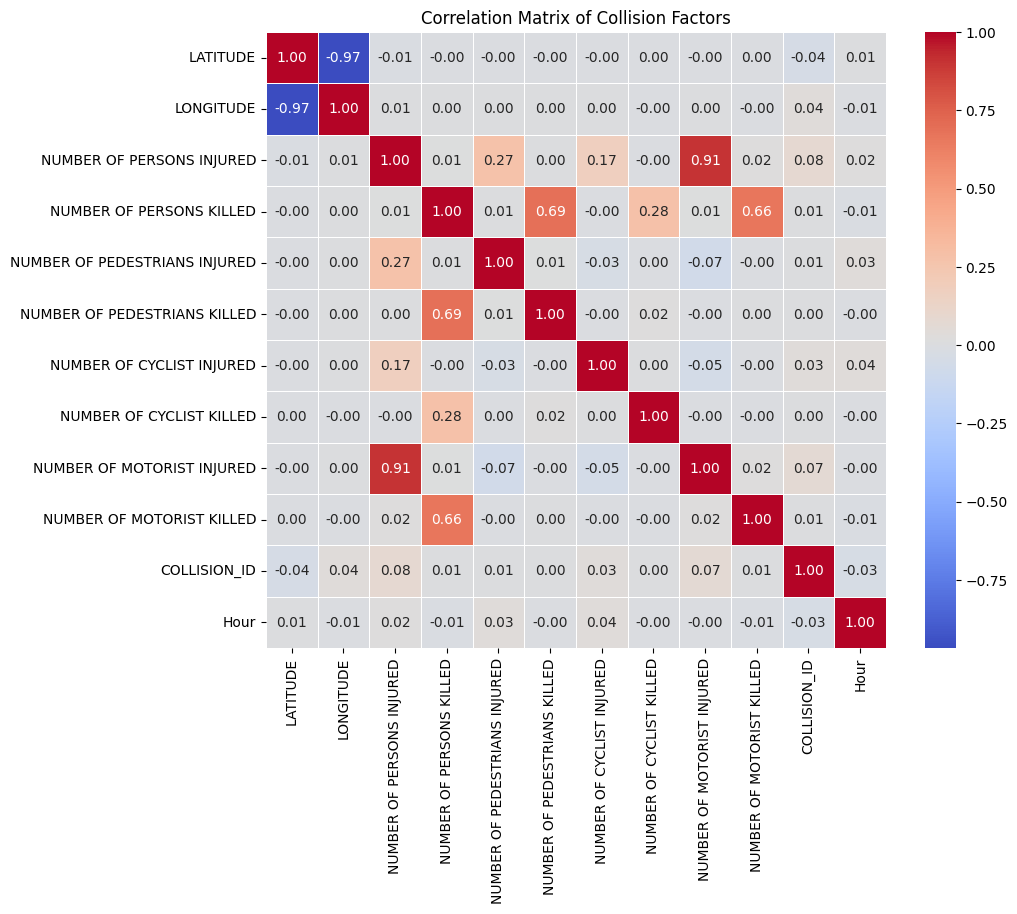

In [18]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlations between numeric columns
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Collision Factors')
plt.show()